In [630]:
import pandas as pd
import altair as alt

In [631]:
pop = pd.read_csv('https://gist.githubusercontent.com/romanvey/68b6fef196ea0489fddba0b358ae1ea9/raw/ccf0b293272c706221c509635d73f83e50a601b6/population.csv')

In [632]:
pop['population'] /= 1000.

In [633]:
BLACK_COLOR = '#5D646F'
GRAY_COLOR = '#CCD2D4'
RED_COLOR = '#D8505F'
BLUE_COLOR = '#3389BD'

In [634]:
grid_options = {
    'gridColor': GRAY_COLOR, 
    'gridDash': [2, 2],
    'gridOpacity': 0.8
}

In [635]:
def add_line(base, line_type, color, strokeDash=None):
    options = {
        'color': color,
    }
    if strokeDash is not None:
        options['strokeDash'] = strokeDash
        
    line = base.mark_line(**options).encode(
        y=alt.Y('population', scale=alt.Scale(domain=[15, 55]), axis=alt.Axis(tickMinStep=5, tickColor=BLACK_COLOR, title=None, **grid_options))
    ).transform_filter(alt.FieldEqualPredicate(field='type', equal=line_type))
    return line

## make X-axis and base chart

In [660]:
x = alt.X('year', scale=alt.Scale(domain=[1950, 2100]), axis=alt.Axis(values=[1950, 1991, 2020, 2100], tickColor=BLACK_COLOR, title=None, **grid_options))
base = alt.Chart(pop, width=1000, height=650).encode(x=x)

## make 'estimate' and 'projection' text fields

In [661]:
text_data = pd.DataFrame({'text': ['estimate', 'projection'], 'year': [1985, 2060], 'position': [53, 53], 'top_color': ['blue', 'red']})

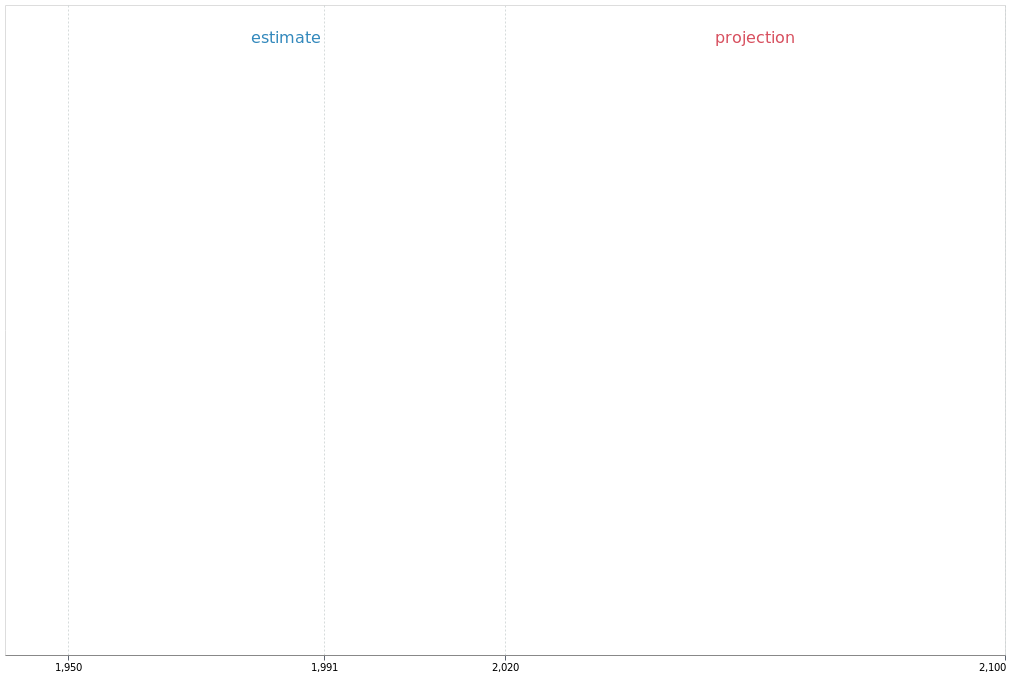

In [662]:
top_text = alt.Chart(text_data, width=1000, height=650).encode(x=x)
top_text = top_text.mark_text(size=16).encode(
    y=alt.Y('position:Q', title=None, axis=None,  scale=alt.Scale(domain=[15, 55])),
    text=alt.Text('text:N'),
    color=alt.Color('top_color:N', scale=alt.Scale(domain=['normal', 'blue', 'red'], range=[BLACK_COLOR, BLUE_COLOR, RED_COLOR]), legend=None))
top_text

## make lines

In [663]:
line_names = list(pop.type.unique())
lines = []
line_names.remove('estimate')
lines.append(add_line(base, 'estimate', '#3389BD'))
for line_name in line_names:
    lines.append(add_line(base, line_name, '#D8505F', [6, 2]))

## concat text and lines

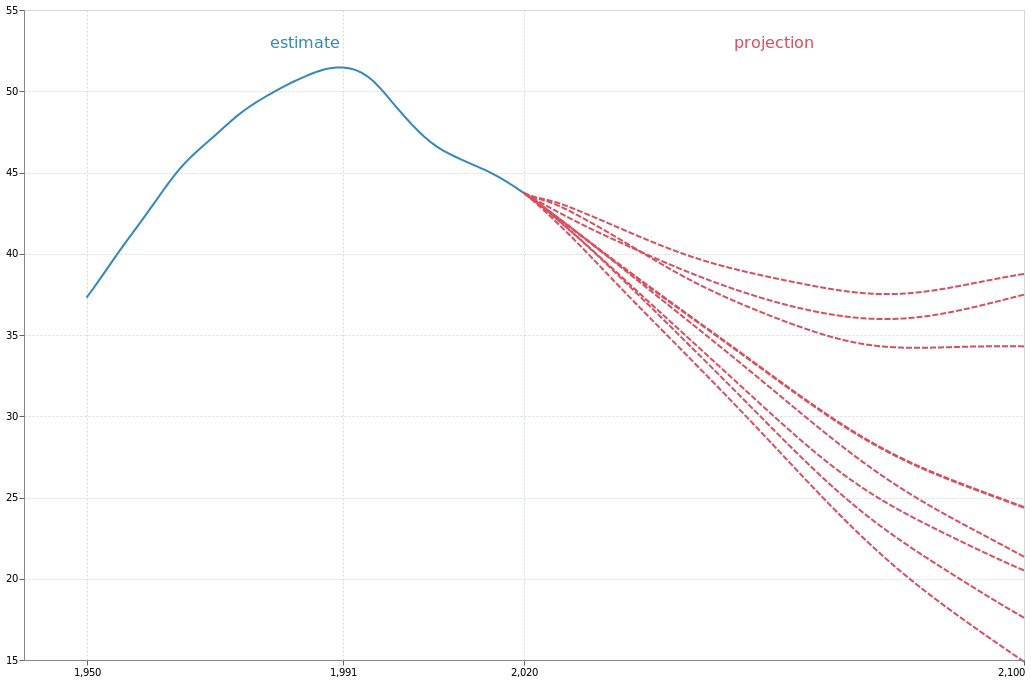

In [664]:
layer = alt.layer(
    top_text,
    *lines
)
layer

## make right sidebar

In [644]:
positions = []
for line_name in line_names:
    position = pop.iloc[pop[pop['type']==line_name]['year'].idxmax()]['population']
    positions.append(position)
label_texts = [
    'medium variant',
    'high variant',
    'low variant',
    'constant fertility',
    'instant replacement',
    'momentum',
    'zero migration',
    'constant mortality',
    'no change'
]
colors = ['red', 'red', 'red', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal']
positions[0] += .3
positions[6] -= .3
labels = {
    'position': positions,
    'text': label_texts,
    'color': colors
}
labels = pd.DataFrame(labels)
labels['x'] = 0.1

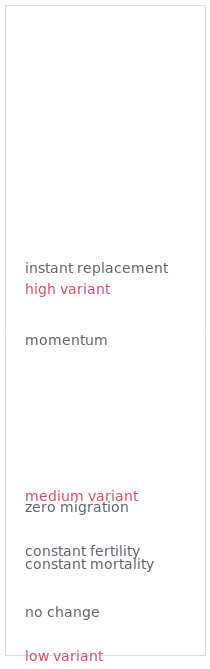

In [645]:
label_chart = alt.Chart(labels, width=200, height=650).mark_text(size=14, align='left').encode(
    x=alt.X('x:Q', title=None, axis=None, scale=alt.Scale(domain=[0, 1])),
    y=alt.Y('position:Q', title=None, axis=None,  scale=alt.Scale(domain=[15, 55])),
    text=alt.Text('text:N'),
    color=alt.Color('color:N', scale=alt.Scale(domain=['normal', 'red'], range=[BLACK_COLOR, '#D8505F']), legend=None),
)
label_chart

## concat all together

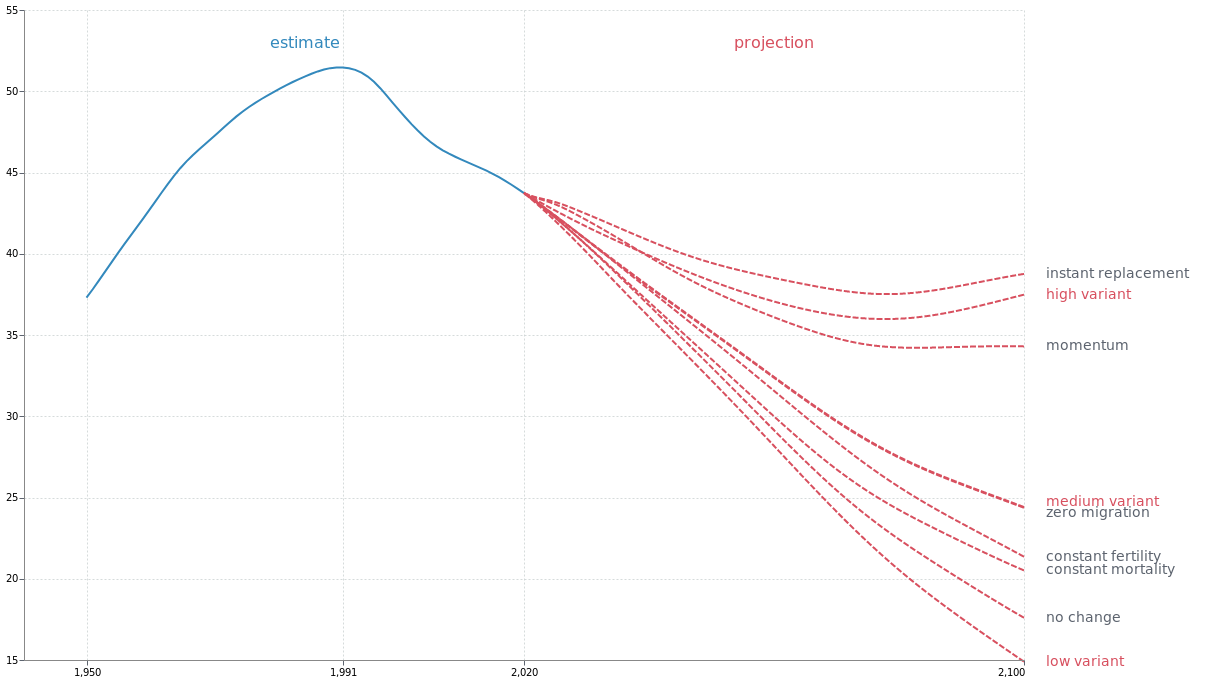

In [667]:
final_chart = alt.hconcat(
    layer,
    label_chart
).configure_view(
    stroke=None
).configure_concat(
    spacing=0
)
final_chart

## save chart

In [653]:
final_chart.save('chart.png', webdriver='firefox')

# Final chart in chart.md